In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt # Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv
/kaggle/input/graduate-admissions/Admission_Predict.csv


In [20]:
#Reading csv file
df=pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')
#printing first 5 rows of data frame
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [22]:
df.shape

(500, 9)

In [23]:
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [24]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [25]:
X=df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research']]
y=df['Chance of Admit ']

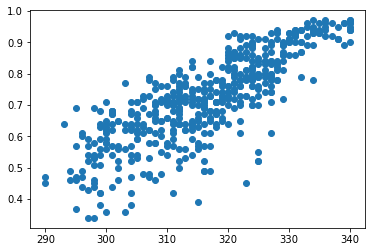

In [26]:
import matplotlib.pyplot as plt
plt.scatter(X['GRE Score'],y)

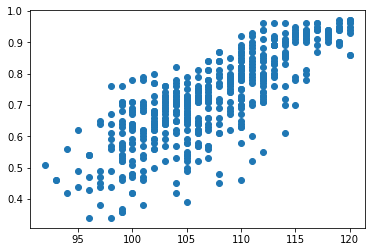

In [27]:
plt.scatter(X['TOEFL Score'],y)

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=14)

In [29]:
X_tested=X_test[['GRE Score']]
X_trained=X_train[['GRE Score']]

**Simple Linear Regression**

In [30]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_trained,y_train)
yhat=LR.predict(X_tested)
print(np.sqrt(mean_squared_error(y_test,yhat)))#out of sample accuracy
print(r2_score(y_test,yhat))

0.08390068715129875
0.6563331181404615


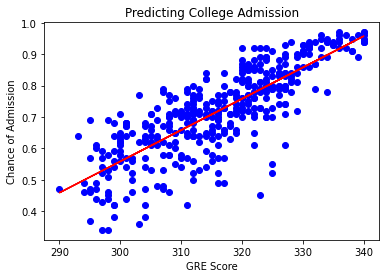

In [31]:
yhated=LR.predict(X_trained)
plt.scatter(X_trained,y_train,color='blue')
plt.plot(X_trained,yhated,color='red')
plt.title('Predicting College Admission')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admission')
plt.show()

**Miltiple Linear Regression**

In [32]:
X_test1=X_test[['GRE Score','CGPA','University Rating']]
X_train1=X_train[['GRE Score','CGPA','University Rating']]

In [33]:
mlr=LinearRegression()
mlr.fit(X_train1,y_train)
yhatmul=mlr.predict(X_test1)

In [34]:
print(np.sqrt(mean_squared_error(y_test,yhatmul)))#out of sample accuracy
print(r2_score(y_test,yhatmul)) #general

0.05348086713960233
0.860362029664429


In [ ]:
data1=df[['GRE Score','CGPA','Chance of Admit ']]
data1=data1.rename(columns={'GRE Score':'GRE','Chance of Admit ':'Chance_of_Admit'})
data1.head()

In [35]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
model = smf.ols(formula='Chance_of_Admit  ~ GRE + CGPA', data=data1)
results_formula = model.fit()
results_formula.params

Intercept   -1.634968
GRE          0.003207
CGPA         0.156464
dtype: float64

In [49]:
x_surf, y_surf = np.meshgrid(np.linspace(data1.GRE.min(), data1.GRE.max(), 100),np.linspace(data1.CGPA.min(), data1.CGPA.max(), 100))
onlyX = pd.DataFrame({'GRE': x_surf.ravel(), 'CGPA': y_surf.ravel()})
fittedY=results_formula.predict(exog=onlyX)
fittedY=np.array(fittedY)

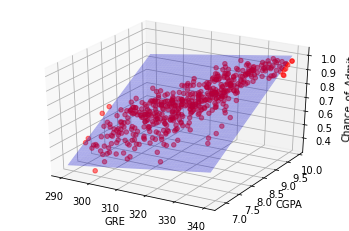

In [50]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data1['GRE'],data1['CGPA'],data1['Chance_of_Admit'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('GRE')
ax.set_ylabel('CGPA')
ax.set_zlabel('Chance_of_Admit')
plt.show()

**Standardization**

In [38]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
Xs=ss.fit_transform(X)
from sklearn.model_selection import train_test_split
X_trains,X_tests,y_trains,y_tests=train_test_split(Xs,y,test_size=0.2,random_state=14)
mlrs=LinearRegression()
mlrs.fit(X_trains,y_trains)
yhats=mlrs.predict(X_tests)
print(np.sqrt(mean_squared_error(y_tests,yhats)))#out of sample accuracy
print(r2_score(y_tests,yhats)) #statndardizatin

0.05444544363769185
0.8552796084504714


**Normalization**

In [39]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
Xm=mm.fit_transform(X)
from sklearn.model_selection import train_test_split
X_trainm,X_testm,y_trainm,y_testm=train_test_split(Xm,y,test_size=0.2,random_state=14)
mlrm=LinearRegression()
mlrm.fit(X_trainm,y_trainm)
yhatm=mlrm.predict(X_testm)
print(np.sqrt(mean_squared_error(y_testm,yhatm)))#out of sample accuracy
print(r2_score(y_testm,yhatm)) #Normalization

0.05444544363769183
0.8552796084504715


***Ridge Regression***

In [40]:
from sklearn.linear_model import Ridge
RR=Ridge(alpha=0.01)
RR.fit(X_train1,y_train)
yhatrr=RR.predict(X_test1)
print(np.sqrt(mean_squared_error(y_test,yhatrr)))#out of sample accuracy
print(r2_score(y_test,yhatrr))

0.05348198669501861
0.860356183308875


**Lasso Regression**

In [41]:
from sklearn.linear_model import Lasso
LR=Lasso(alpha=0.01)
LR.fit(X_train1,y_train)
yhatlr=RR.predict(X_test1)
print(np.sqrt(mean_squared_error(y_test,yhatlr)))#out of sample accuracy
print(r2_score(y_test,yhatlr))

0.05348198669501861
0.860356183308875


**ElasticNet Regression**

In [42]:
from sklearn.linear_model import ElasticNet
ER=ElasticNet(alpha=0.01)
ER.fit(X_train1,y_train)
yhater=ER.predict(X_test1)
print(np.sqrt(mean_squared_error(y_test,yhater)))#out of sample accuracy
print(r2_score(y_test,yhater))

0.05804762913684518
0.8354963192185947
